Python for AI Engineer - Exercise 1 - EDA

Perform an EDA on Kaggle heart dataset (https://www.kaggle.com/ronitf/heart-disease-uci)

Include in your analysis the following sections:

- [ ] info
- [ ] describe
- [ ] corr
- [ ] plot
- [ ] normalization
- [ ] pca
- [ ] svd
- [ ] data engineering
- [ ] outliers
- [ ] missing values
- [ ] train test split
- [ ] find interesting subgroups


In [63]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Data Collection

In [64]:
raw_df = pd.read_csv("heart.csv")

In [65]:
raw_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


After getting data we need to check the data-type of features.
There are following types of features :
- numeric
- categorical
- ordinal
- datetime
- coordinates


In order to know the data types/features of data, we need to run following command:

In [66]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Describing the dataset

In [67]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the info is seems that:
1. All the fields are **numeric** values,
2. There are no strings, datetime or object types
3. There are no null values
Thus we can perform numerical operation on them. 

## Findings the categorical featrues
We will find the categorical featrues using
1. <code>describe</code> and <code>nunique</code>
2. Dataset description

In [68]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Dataset Description:

Numarical continous features:
1. 'age'  - age in years, 29-77
2. 'trestbps' - resting blood pressure (in mm Hg on admission to the hospital), 94-200
3. 'chol' - serum cholestoral in mg/dl, 126-564
4. 'thalach' - maximum heart rate achieved, 71-202
5. 'oldpeak' - ST depression induced by exercise relative to rest, 0-6.2

Categorical features:
1. 'sex' - (1 = male; 0 = female)
2. 'cp' - chest pain type, (0 - 3)
3. 'restecg' - resting electrocardiographic results,  (0,1,2)
4. 'fbs' - (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
5. 'exang' - exercise induced angina (1 = yes; 0 = no)
6. 'ca' - number of major vessels colored by flourosopy, (0-3)
7. 'thal '- 3 = normal; 6 = fixed defect; 7 = reversable defect
8. 'slope' - the slope of the peak exercise ST segment, (0,1,2)

Target:
'target' - Presence of heart disease in the patient,  (1 = true; 0 = false)

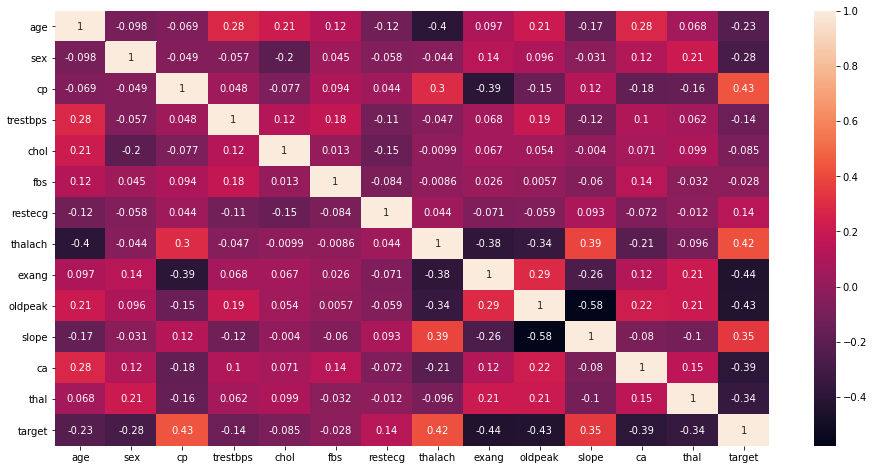

In [69]:
pyplot.subplots(figsize=(16,8))
sns.heatmap(raw_df.corr(), annot = True);

We should consider to perform **one hot encoding** on the categorical data for better classification (e.g. higher values does not neccsiraly represnet the correct corraltion between the feature's values)

# Data Validation

In [70]:
data_df = raw_df.copy()

In [71]:
## Check for duplicates

In [72]:
data_df.drop_duplicates(inplace=True)

In [73]:
len(raw_df) - len(data_df)

1

## Match the features to the description

In [74]:
data_df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [75]:
## Problematic features

### Feture ca
feature ‘ca’ ranges from 0–3, however, df.nunique() listed 0–4. So lets find the ‘4’.

In [76]:
data_df[data_df.ca == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


Handling invalid data

In [77]:
# trying to find another feature with siginficant correlation 

In [78]:
ca_pearson = data_df.corr('pearson')['ca'].drop(labels=['ca', 'target'])
ca_spearman = data_df.corr('spearman')['ca'].drop(labels=['ca', 'target'])
ca_kendall = data_df.corr('kendall')['ca'].drop(labels=['ca', 'target'])
ca_corr = { 'pearson': ca_pearson, 'spearman': ca_spearman, 'kendall': ca_kendall }

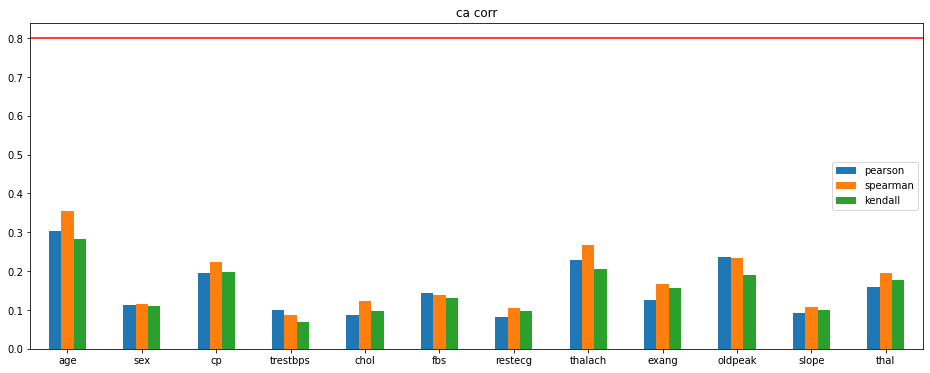

In [79]:
fig, ax = pyplot.subplots(figsize=(16,8))
plt.axhline(y=0.8, color='r', linestyle='-')
abs(pd.DataFrame(ca_corr)).plot(ax = ax, kind='bar', figsize=(16, 6), title = 'ca corr', rot=0);

We will change the wrong value to np.NaN

In [80]:
data_df.loc[data_df.ca == 4, 'ca'] = np.NaN

## Feathre thal
Feature ‘thal’ ranges from 1–3, however, df.nunique() listed 0–3. There are two values of ‘0’. So lets change them to NaN.

In [81]:
data_df[data_df.thal == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [82]:
data_df.loc[data_df.thal == 0, 'thal'] = np.NaN

In [83]:
## filling NA

In [84]:
# filling NaN values with the median

In [85]:
data_df.fillna(data_df.median(), inplace=True)

In [86]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  target    302 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 35.4 KB


## Feature engineering

### Converting categorical features to category type

In [87]:
data_df['target'] = data_df.target.replace({1: "Disease", 0: "No_disease"}).astype("category")
data_df['sex'] = data_df.sex.replace({1: "Male", 0: "Female"}).astype("category")
data_df['cp'] = data_df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"}).astype("category")
data_df['exang'] = data_df.exang.replace({1: "Yes", 0: "No"}).astype("category")
data_df['fbs'] = data_df.fbs.replace({1: "True", 0: "False"}).astype("category")
data_df['slope'] = data_df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"}).astype("category")
data_df['thal'] = data_df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"}).astype("category")

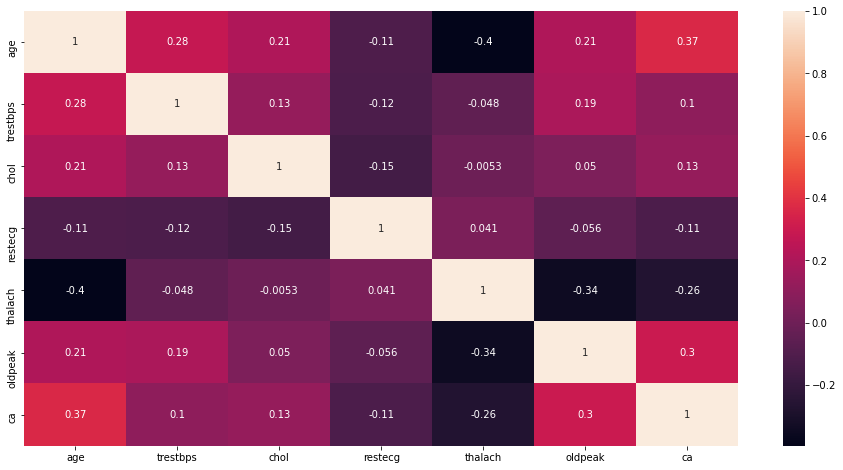

In [88]:
# Now the correlation only uses the numerical features
fig, ax = pyplot.subplots(figsize=(16,8))
sns.heatmap(data_df.corr(), ax = ax, annot = True);

### outliers

In [89]:
numeric_df = data_df._get_numeric_data()

In [90]:
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

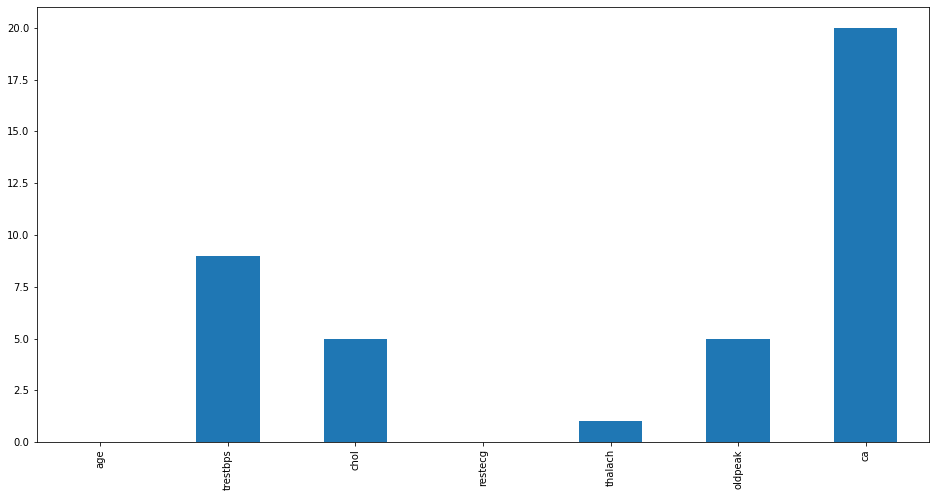

In [91]:
pyplot.subplots(figsize=(16,8))

((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum().plot(kind='bar');

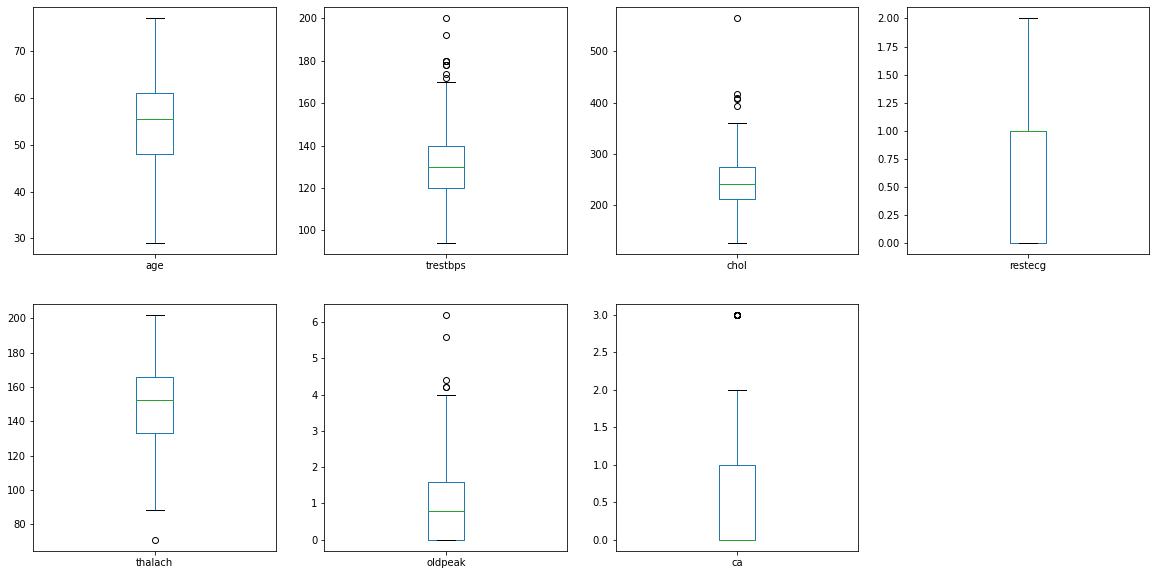

In [92]:
data_df.plot(kind='box', subplots=True, sharey=False, figsize=(20, 10), layout=(2,4));

In [93]:
# Removing the outliers

# normalize the df using Z score to normal distribution
# keep the entries under 1.5

from scipy import stats

z_scores = stats.zscore(numeric_df)
abs_z_scores = np.abs(z_scores)
keep_entries = (abs_z_scores < 1.5).all(axis=1)
numeric_wo_outliers = numeric_df[keep_entries]

In [94]:
Q1 = numeric_wo_outliers.quantile(0.25)
Q3 = numeric_wo_outliers.quantile(0.75)
IQR = Q3 - Q1
((numeric_wo_outliers < (Q1 - 1.5 * IQR)) | (numeric_wo_outliers > (Q3 + 1.5 * IQR))).sum()

age         0
trestbps    0
chol        0
restecg     0
thalach     0
oldpeak     0
ca          0
dtype: int64

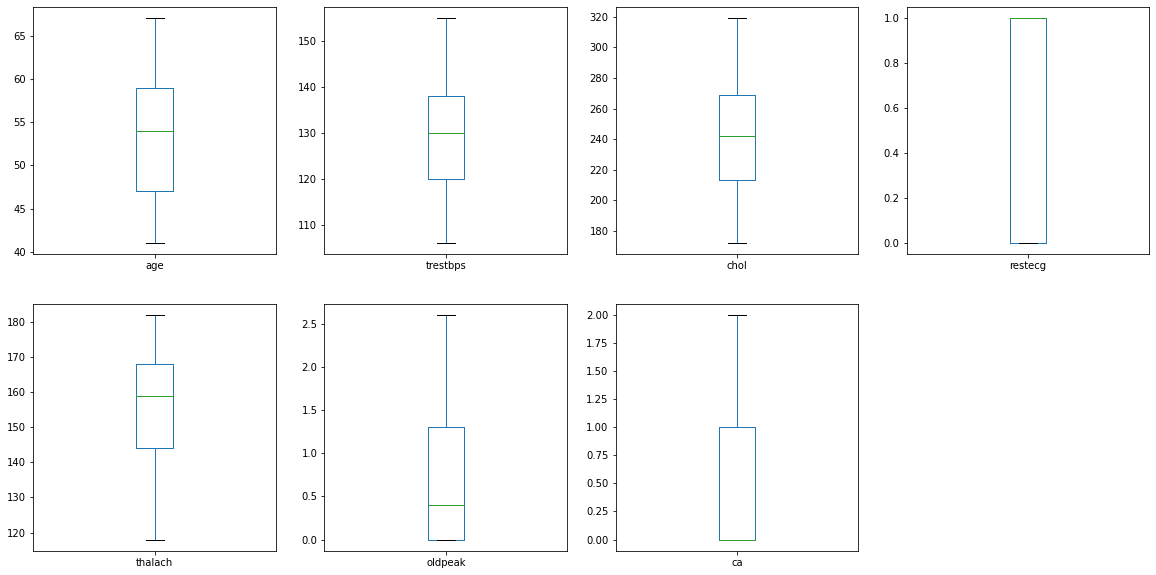

In [95]:
numeric_wo_outliers.plot(kind='box', subplots=True, sharey=False, figsize=(20, 10), layout=(2,4));

# Data Preprocessing

## Reducing dimension using SVD

In [96]:
from numpy import linalg

def svd(A, tol=1e-5):
    #singular values and right singular vectors coming from eigenvalues and eigenvectors of A' x A
    eigs, V = linalg.eig(A.T.dot(A))

    #singular values are the square root of the eigenvalues
    sing_vals = np.sqrt(eigs)

    #sort both sigular values and right singular vector
    idx = np.argsort(sing_vals)

    sing_vals = sing_vals[idx[::-1]]
    V = V[:, idx[::-1]]

    #remove zero singular values below tol
    sing_vals_trunc = sing_vals[sing_vals>tol]
    V = V[:, sing_vals>tol]

    #is not necessary to store the entire sigma matrix, so only the diagonal is returned
    sigma = sing_vals_trunc

    #evaluate U matrix
    U = A @ V /sing_vals_trunc
    
    return U.real, sigma.real, V.T.real

def truncate(U, S, V, k):
    U_trunc = U[:, :k]
    S_trunc = S[:k]
    V_trunc = V[:k, :]
    return U_trunc, S_trunc, V_trunc

In [97]:
# reducing parameters to k = 2

k = 2

A = data_df._get_numeric_data().values


U, S, Vt = svd(A)

U_trunc, S_trunc, Vt_trunc = truncate(U, S, Vt, k)

trunc_A = U_trunc @ np.diag(S_trunc)
reduced_data = pd.DataFrame(trunc_A)




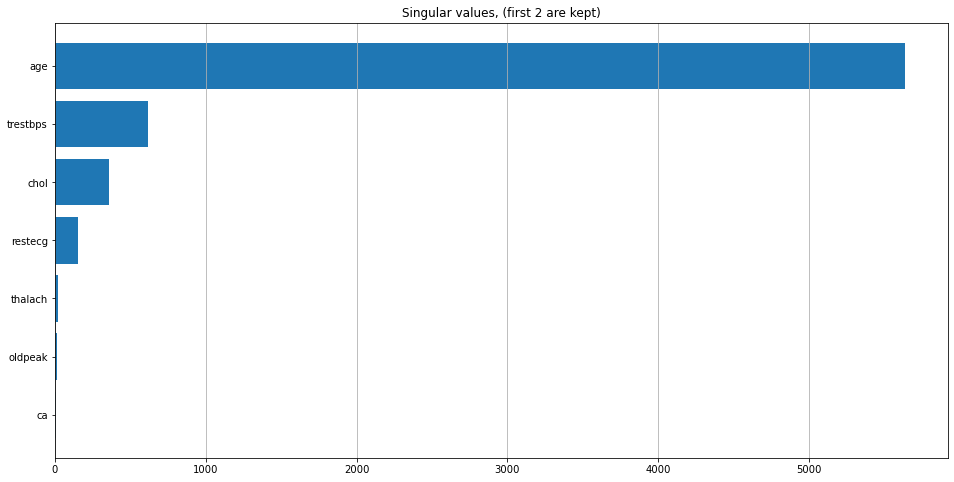

In [98]:
plt.figure(figsize=(16,8))
plt.barh(data_df._get_numeric_data().columns[::-1], S[::-1])
plt.title(f"Singular values, (first {k} are kept)")
plt.gca().xaxis.grid(True)

## Reducing dimension using PCA

In [99]:
data_for_pca = data_df._get_numeric_data()

In [100]:
data_for_pca.head()

,age,trestbps,chol,restecg,thalach,oldpeak,ca
0,63,145,233,0,150,2.3,0.0
1,37,130,250,1,187,3.5,0.0
2,41,130,204,0,172,1.4,0.0
3,56,120,236,1,178,0.8,0.0
4,57,120,354,1,163,0.6,0.0


In [101]:
from sklearn import preprocessing

scaled_data = preprocessing.scale(data_for_pca)

In [102]:
from sklearn.decomposition import PCA
pca = PCA()

In [103]:
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

In [104]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
pc_labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

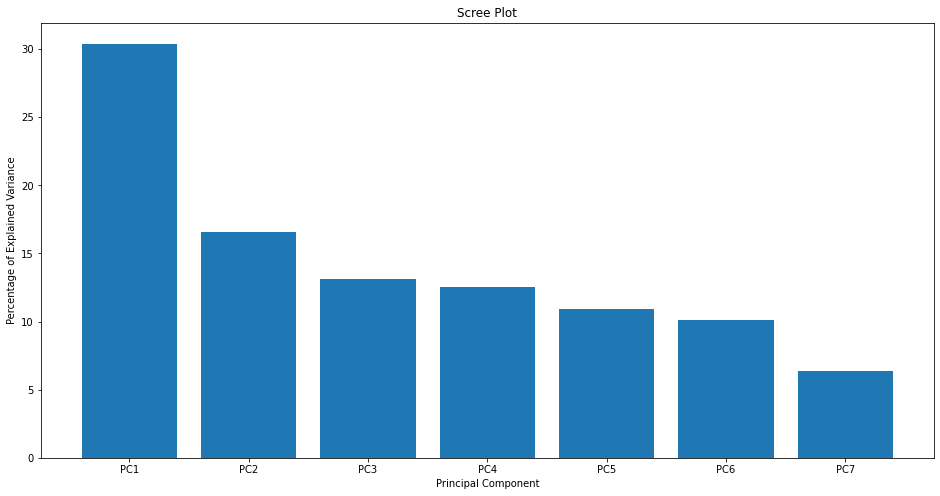

In [105]:
plt.figure(figsize=(16,8))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=pc_labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

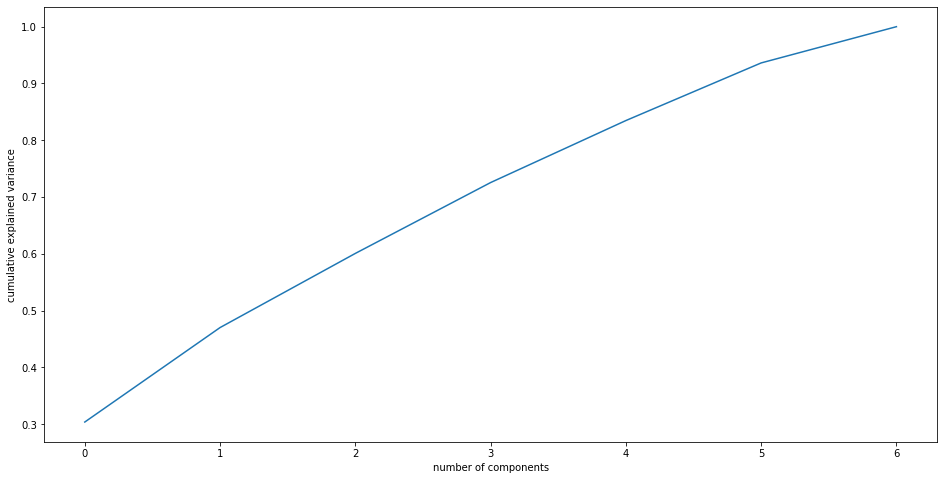

In [106]:
plt.figure(figsize=(16,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [107]:
# The PCA shows that the component variation is approximatly the same

In [108]:
# Finding the most varied features

loading_scores = pd.Series(pca.components_[0], index=data_for_pca.columns)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores.index.values

array(['age', 'ca', 'thalach', 'oldpeak', 'trestbps', 'chol', 'restecg'],
      dtype=object)

# Data Visualisation

In [109]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,asymtomatic,145,233,True,0,150,No,2.3,upsloping,0.0,fixed_defect,Disease
1,37,Male,non-anginal pain,130,250,False,1,187,No,3.5,upsloping,0.0,reversable_defect,Disease
2,41,Female,atypical_angina,130,204,False,0,172,No,1.4,downsloping,0.0,reversable_defect,Disease
3,56,Male,atypical_angina,120,236,False,1,178,No,0.8,downsloping,0.0,reversable_defect,Disease
4,57,Female,typical_angina,120,354,False,1,163,Yes,0.6,downsloping,0.0,reversable_defect,Disease


In [110]:
# Dataset target balance

In [111]:
data_df.target.value_counts()

Disease       164
No_disease    138
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

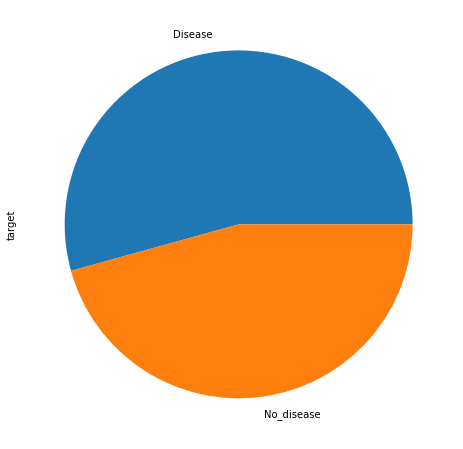

In [112]:
plt.figure(figsize=(16,8))
data_df.target.value_counts().plot(kind='pie')

In [113]:
# Sex target distbution

<AxesSubplot:title={'center':'Male'}, ylabel='target'>

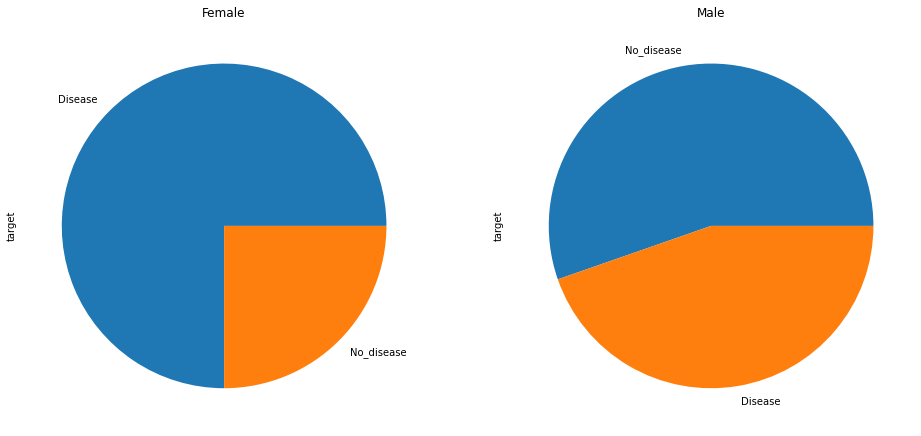

In [114]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

data_df.loc[data_df['sex']=='Female', 'target'].value_counts().plot(kind='pie', title='Female', ax=axs[0])
data_df.loc[data_df['sex']=='Male', 'target'].value_counts().plot(kind='pie', title='Male', ax=axs[1] )

In [115]:
data_df.describe()

,age,trestbps,chol,restecg,thalach,oldpeak,ca
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,0.526490,149.569536,1.043046,0.665563
std,9.04797,17.563394,51.753489,0.526027,22.903527,1.161452,0.935142
min,29.00000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,0.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,1.000000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,1.000000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,2.000000,202.000000,6.200000,3.000000


In [116]:
# cut the age accoring to the percenatiles

age_labels = ["29-48","48-55","55-61","61+"]
data_df['age_bins'] = pd.cut(data_df.age,bins=[29,48,55,61,120], labels=age_labels)

In [117]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,Male,asymtomatic,145,233,True,0,150,No,2.3,upsloping,0.0,fixed_defect,Disease,61+
1,37,Male,non-anginal pain,130,250,False,1,187,No,3.5,upsloping,0.0,reversable_defect,Disease,29-48
2,41,Female,atypical_angina,130,204,False,0,172,No,1.4,downsloping,0.0,reversable_defect,Disease,29-48
3,56,Male,atypical_angina,120,236,False,1,178,No,0.8,downsloping,0.0,reversable_defect,Disease,55-61
4,57,Female,typical_angina,120,354,False,1,163,Yes,0.6,downsloping,0.0,reversable_defect,Disease,55-61


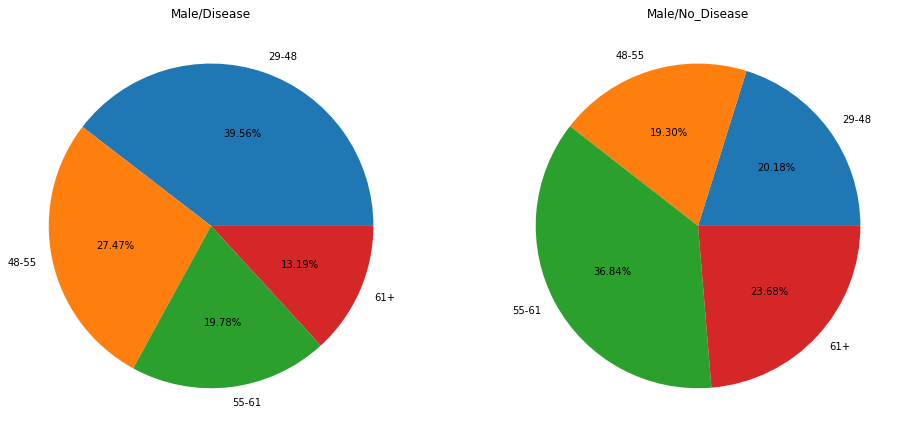

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))
md = data_df[(data_df.sex == 'Male') & (data_df.target == 'Disease')].groupby(['age_bins']).count()['age']
mnd = data_df[(data_df.sex == 'Male') & (data_df.target == 'No_disease')].groupby(['age_bins']).count()['age']
axs[0].set_title('Male/Disease')
axs[0].pie(md, autopct='%1.2f%%', labels = age_labels);
axs[1].set_title('Male/No_Disease')
axs[1].pie(mnd, autopct='%1.2f%%', labels = age_labels);


In [119]:
#fix, axs = pyplot.subplots(figsize=(16,8))
#groupBySex = data_df.groupby(['sex', 'age_cat', 'target']).count()['age'].unstack();
#.plot(kind='pie', subplots=True,ax = axs);

In [120]:
#from matplotlib import pyplot as plt
#import numpy as np
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#ax.axis('equal')
#ax.pie(groupBySex.stack(), labels = data_df.age_cat.value_counts(),autopct='%1.2f%%')
#plt.show()

In [121]:
#df = data_df.groupby(['age_bins', 'target']).count().unstack(fill_value=0)
#print (df)
#df.plot.pie(subplots=True,figsize=(8, 3))

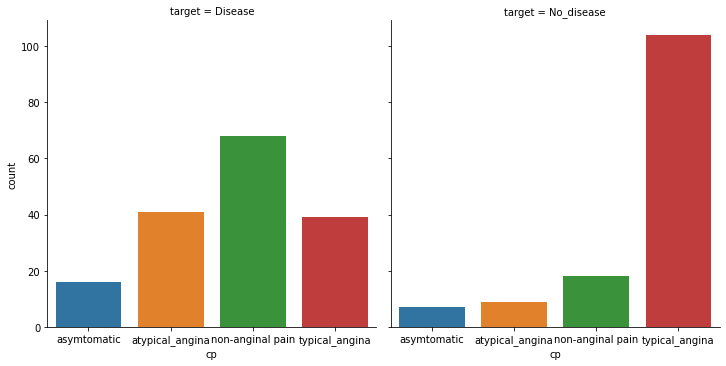

In [122]:
sns.catplot(x='cp', col='target', kind='count', data=data_df);

In [123]:
data_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bins
0,63,Male,asymtomatic,145,233,True,0,150,No,2.3,upsloping,0.0,fixed_defect,Disease,61+
1,37,Male,non-anginal pain,130,250,False,1,187,No,3.5,upsloping,0.0,reversable_defect,Disease,29-48
2,41,Female,atypical_angina,130,204,False,0,172,No,1.4,downsloping,0.0,reversable_defect,Disease,29-48
3,56,Male,atypical_angina,120,236,False,1,178,No,0.8,downsloping,0.0,reversable_defect,Disease,55-61
4,57,Female,typical_angina,120,354,False,1,163,Yes,0.6,downsloping,0.0,reversable_defect,Disease,55-61


<AxesSubplot:xlabel='age_bins', ylabel='trestbps'>

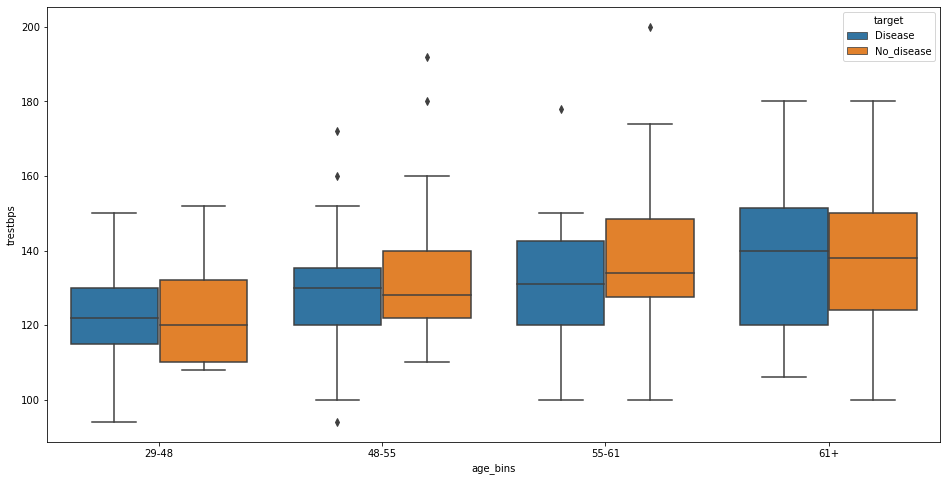

In [124]:
plt.figure(figsize=(16,8))
sns.boxplot(x = 'age_bins', y = 'trestbps', hue = 'target', data=data_df)

<AxesSubplot:ylabel='sex'>

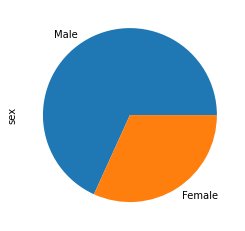

In [125]:
data_df.sex.value_counts(normalize=True)
data_df.groupby('sex').count()
data_df.sex.value_counts(normalize=True).plot(kind='pie')


<AxesSubplot:xlabel='target', ylabel='oldpeak'>

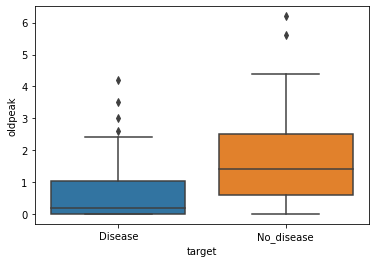

In [126]:
sns.boxplot(x='target', y='oldpeak', data=data_df)

In [127]:
<a id='another_cell'></a>

SyntaxError: invalid syntax (<ipython-input-127-03d9ba1a4503>, line 1)

[Another Cell](#another_cell)